In [1]:
import numpy as np
from fastplotlib import Image, GridPlot

/home/kushal/Insync/kushalkolar@gmail.com/drive/repos/fastplotlib/fastplotlib/layouts.py:61: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if controllers == "sync":


RFBOutputContext()


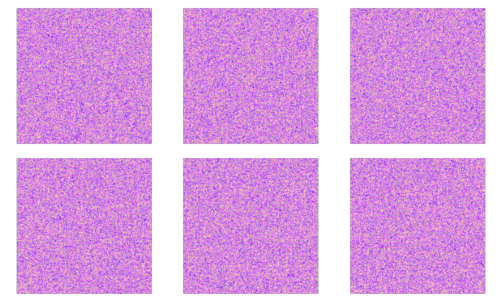

JupyterWgpuCanvas()

In [2]:
# GridPlot of shape 2 x 3
grid_plot = GridPlot(shape=(2, 3))

image_graphics = list()

# Make a random image graphic for each subplot
for subplot in grid_plot:
    img = np.random.rand(512, 512) * 255
    ig = Image(data=img, vmin=0, vmax=255, cmap='gnuplot2')
    image_graphics.append(ig)
    
    # add the graphic to the subplot
    subplot.add_graphic(ig)

# Define a function to update the image graphics 
# with new randomly generated data
def set_random_frame():
    for ig in image_graphics:
        new_data = np.random.rand(512, 512) * 255
        ig.update_data(data=new_data)

# add the animation
grid_plot.add_animations([set_random_frame])

grid_plot.show()